/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6300/6300 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
6300/6300 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
6300/6300 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


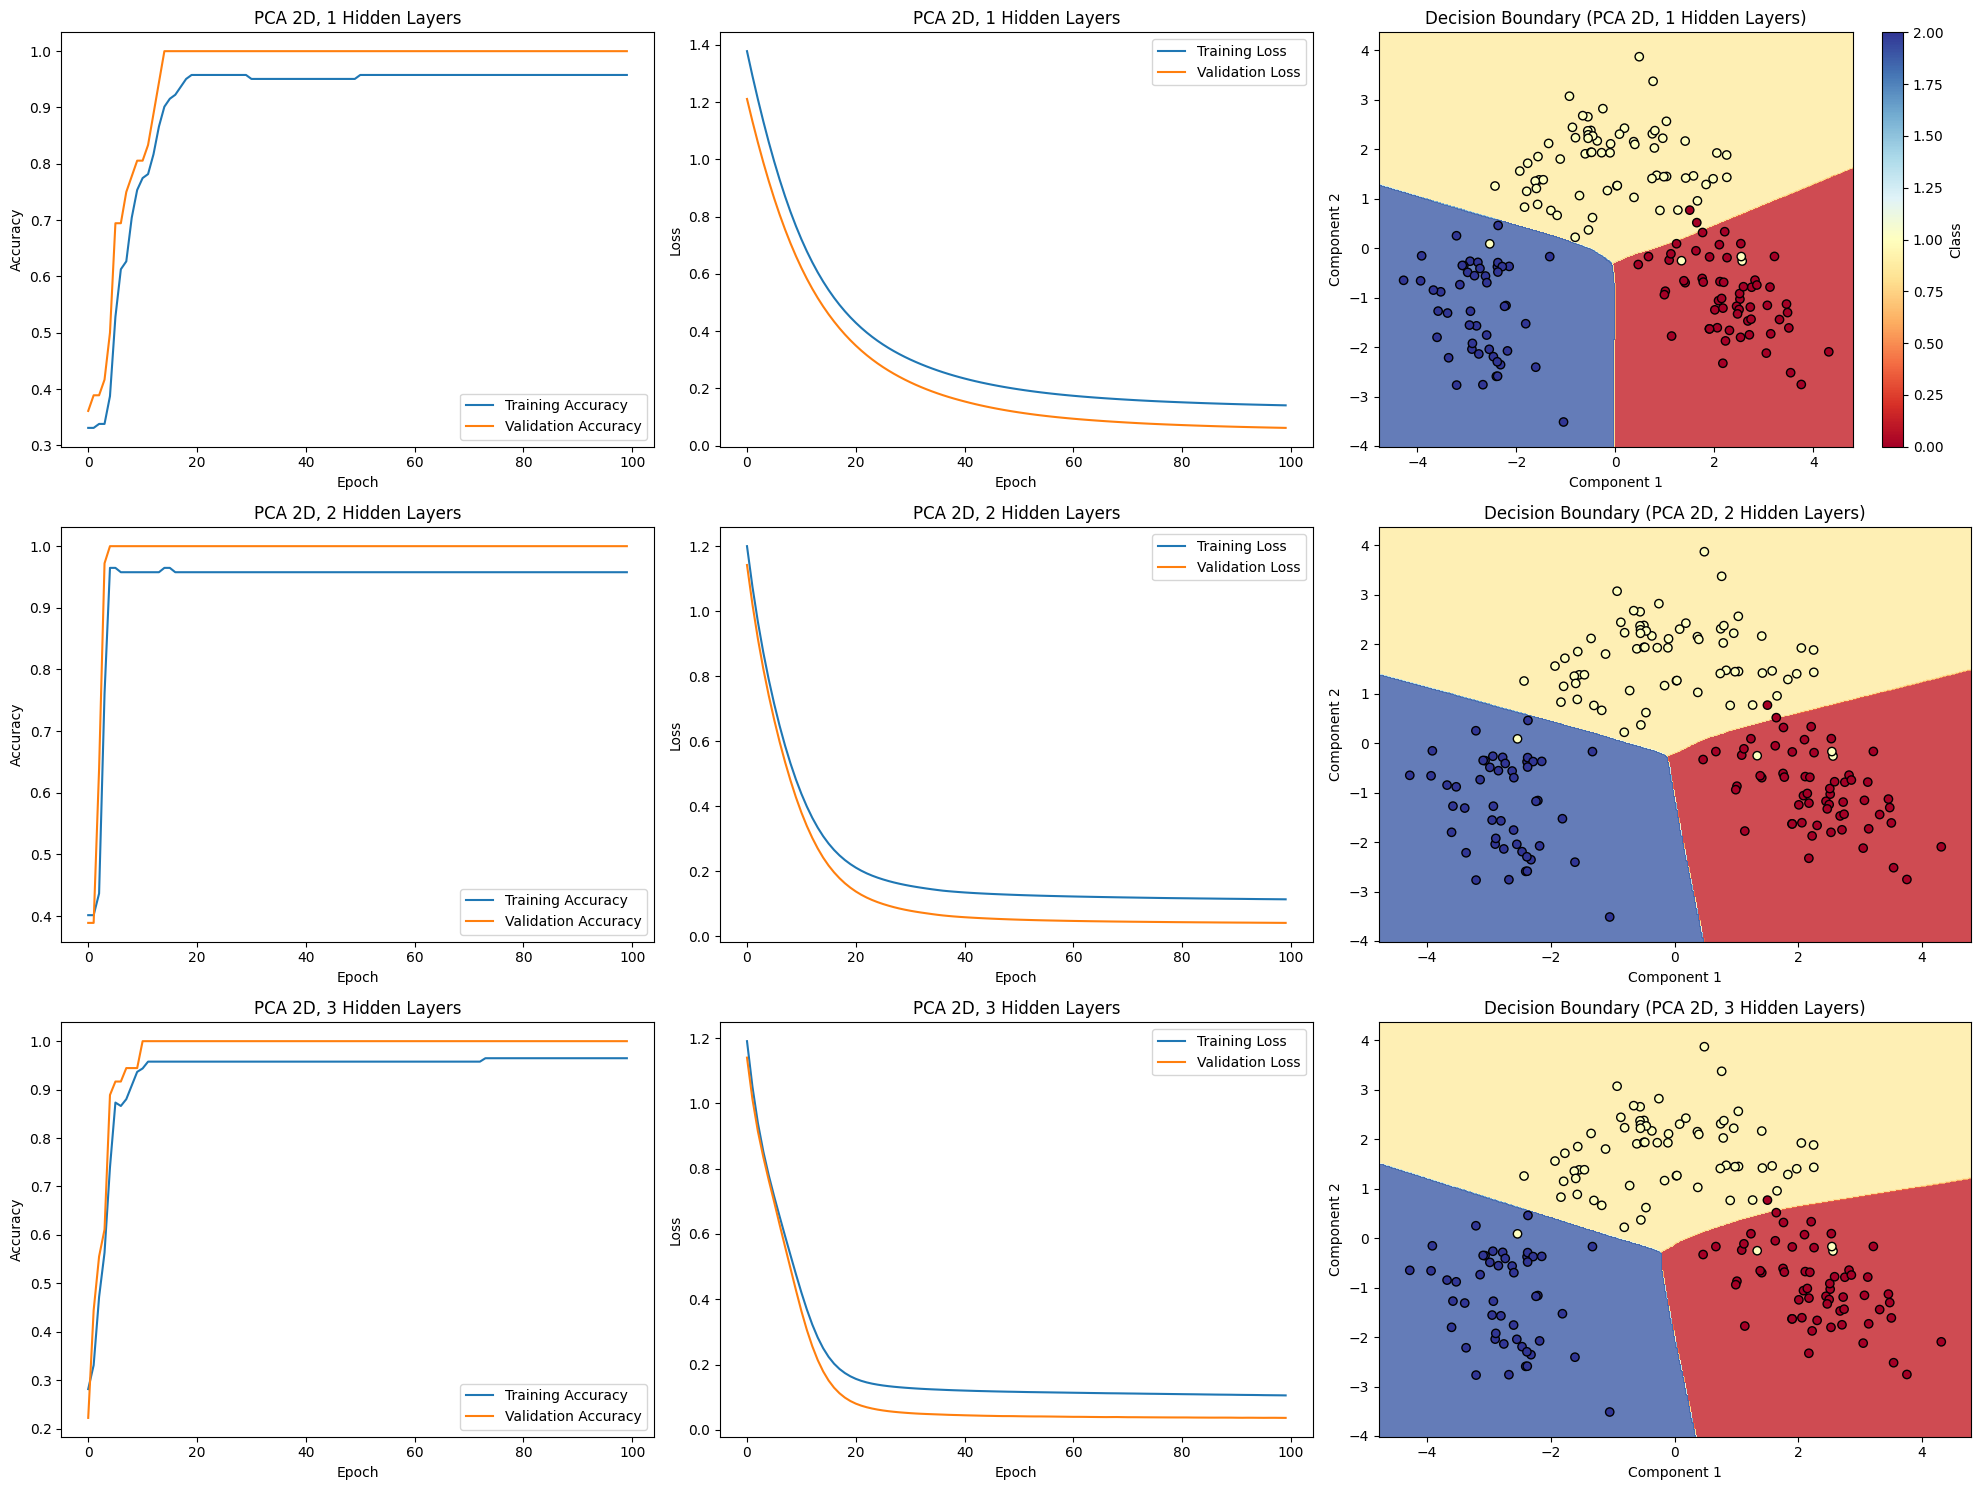

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


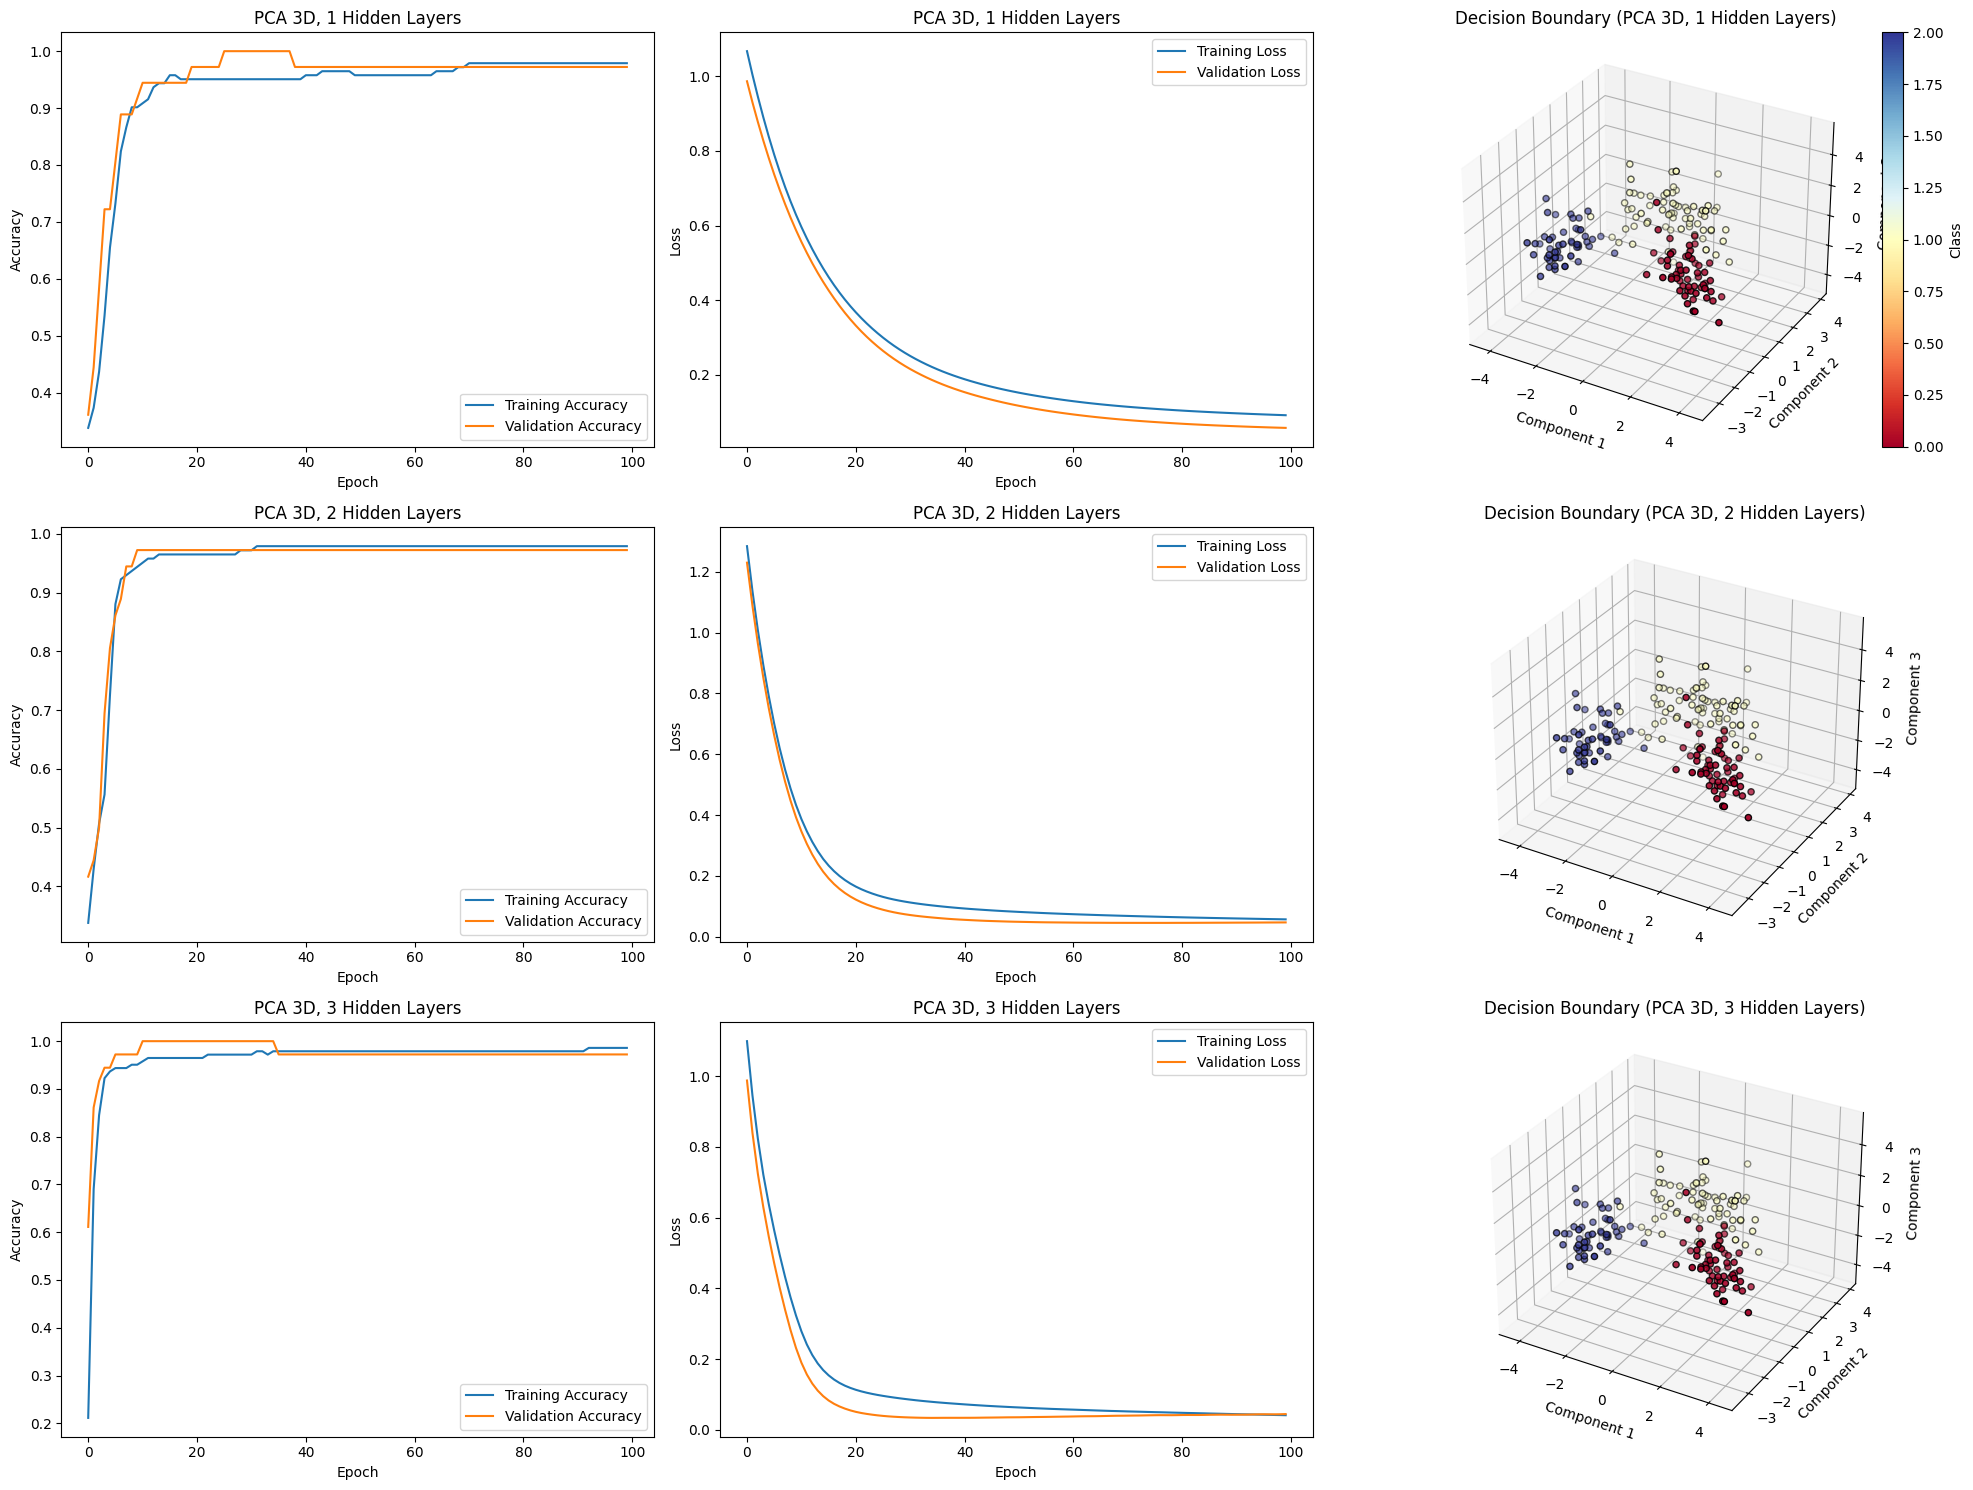

43732/43732 ━━━━━━━━━━━━━━━━━━━━ 58s 1ms/step
43732/43732 ━━━━━━━━━━━━━━━━━━━━ 60s 1ms/step
43732/43732 ━━━━━━━━━━━━━━━━━━━━ 61s 1ms/step


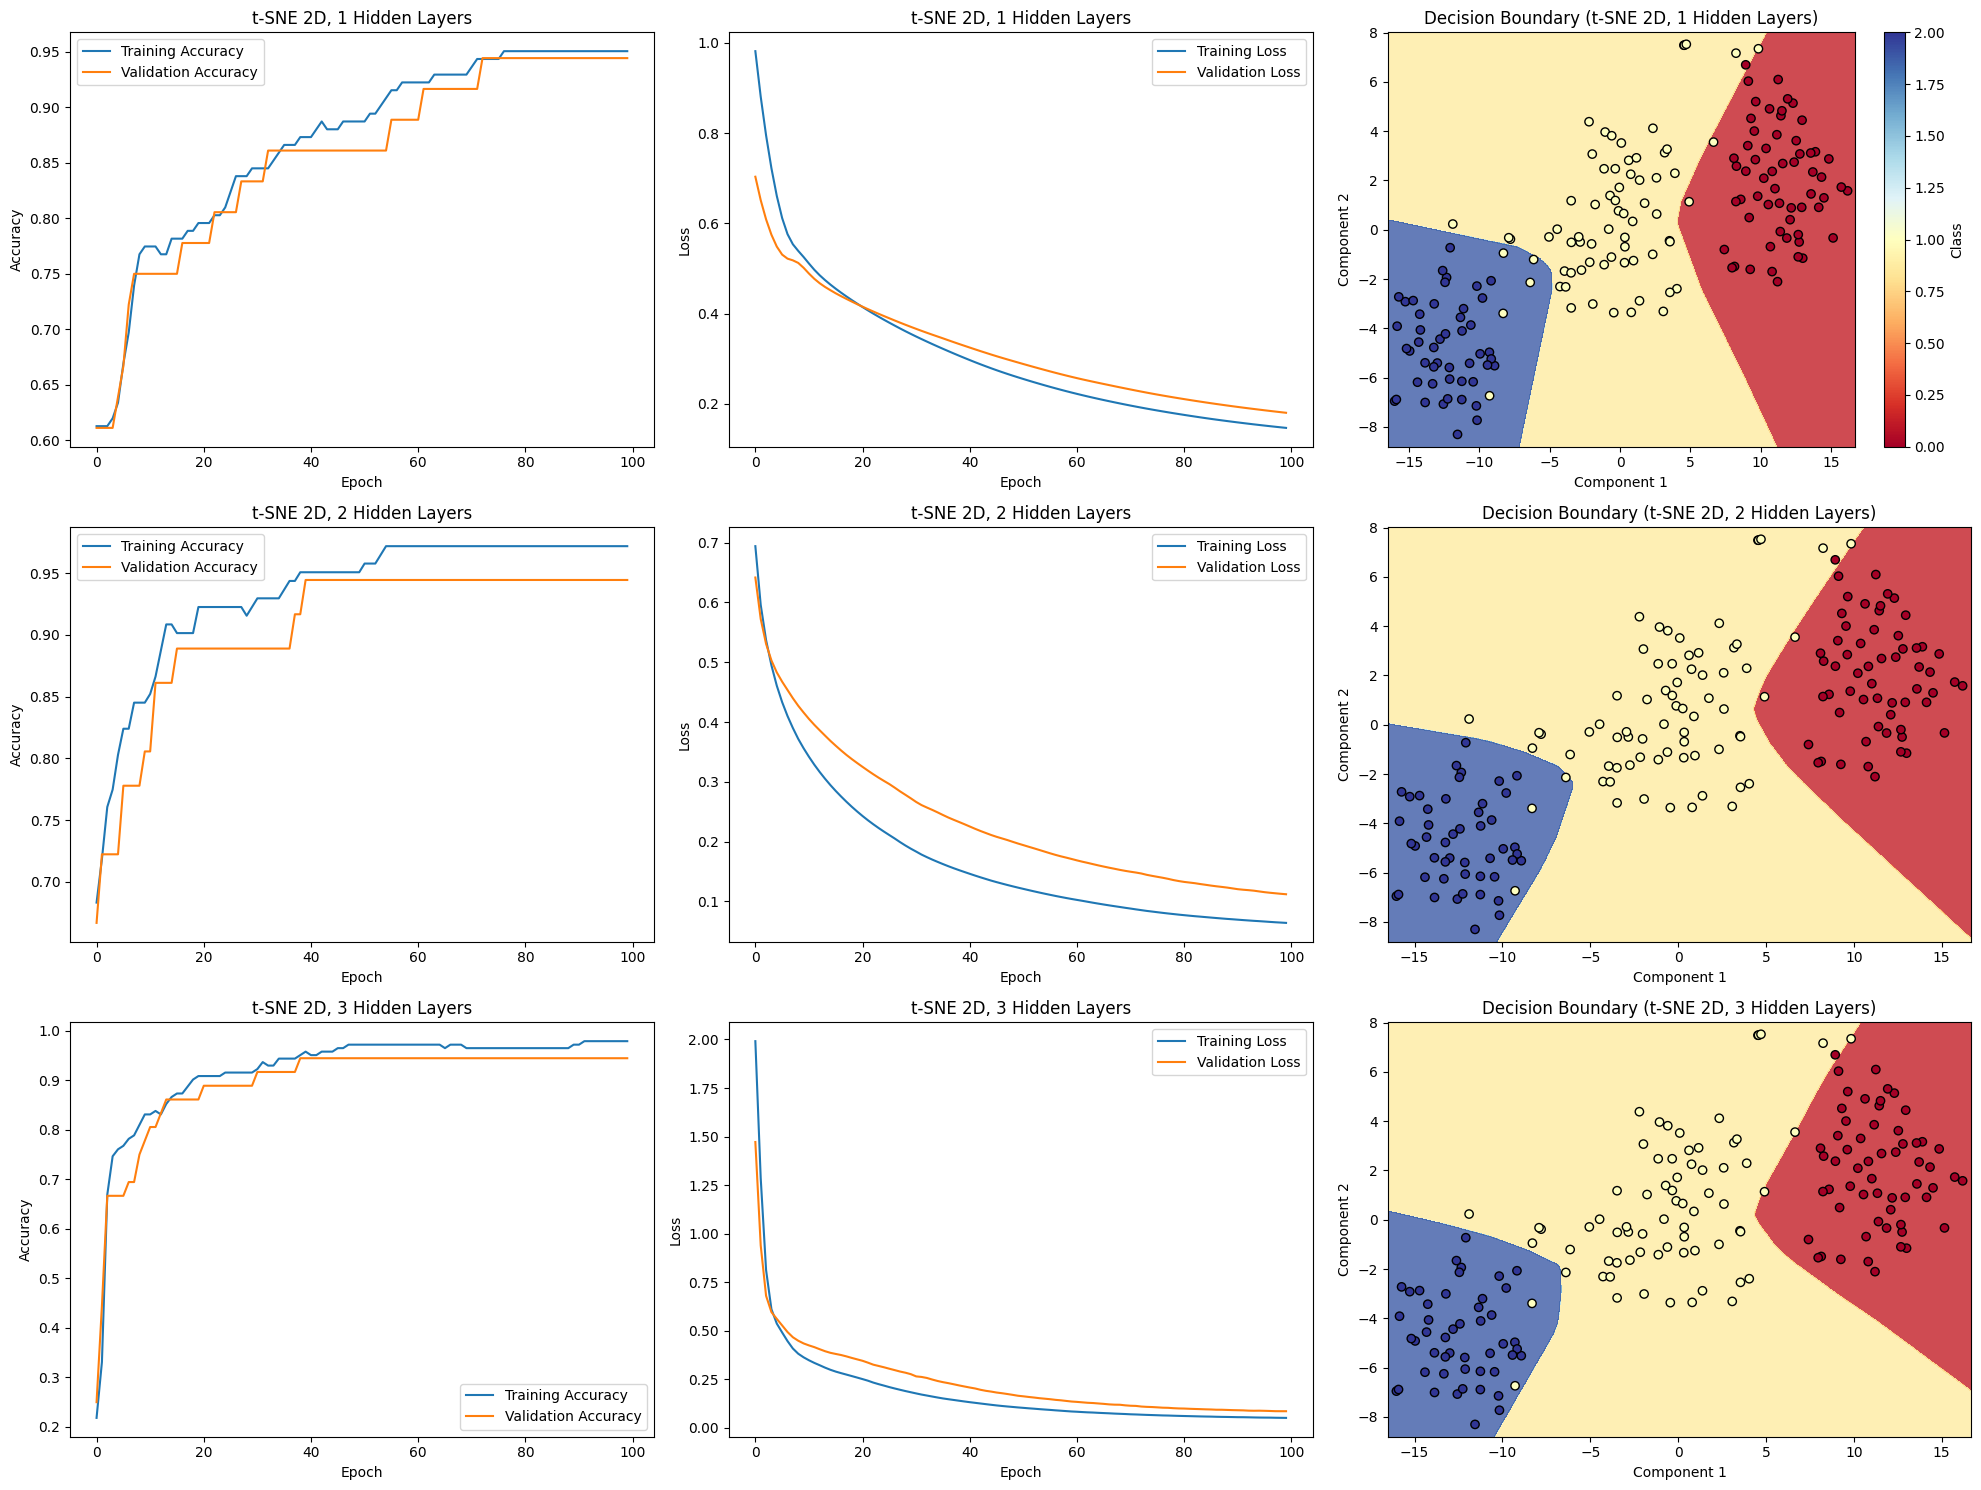

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


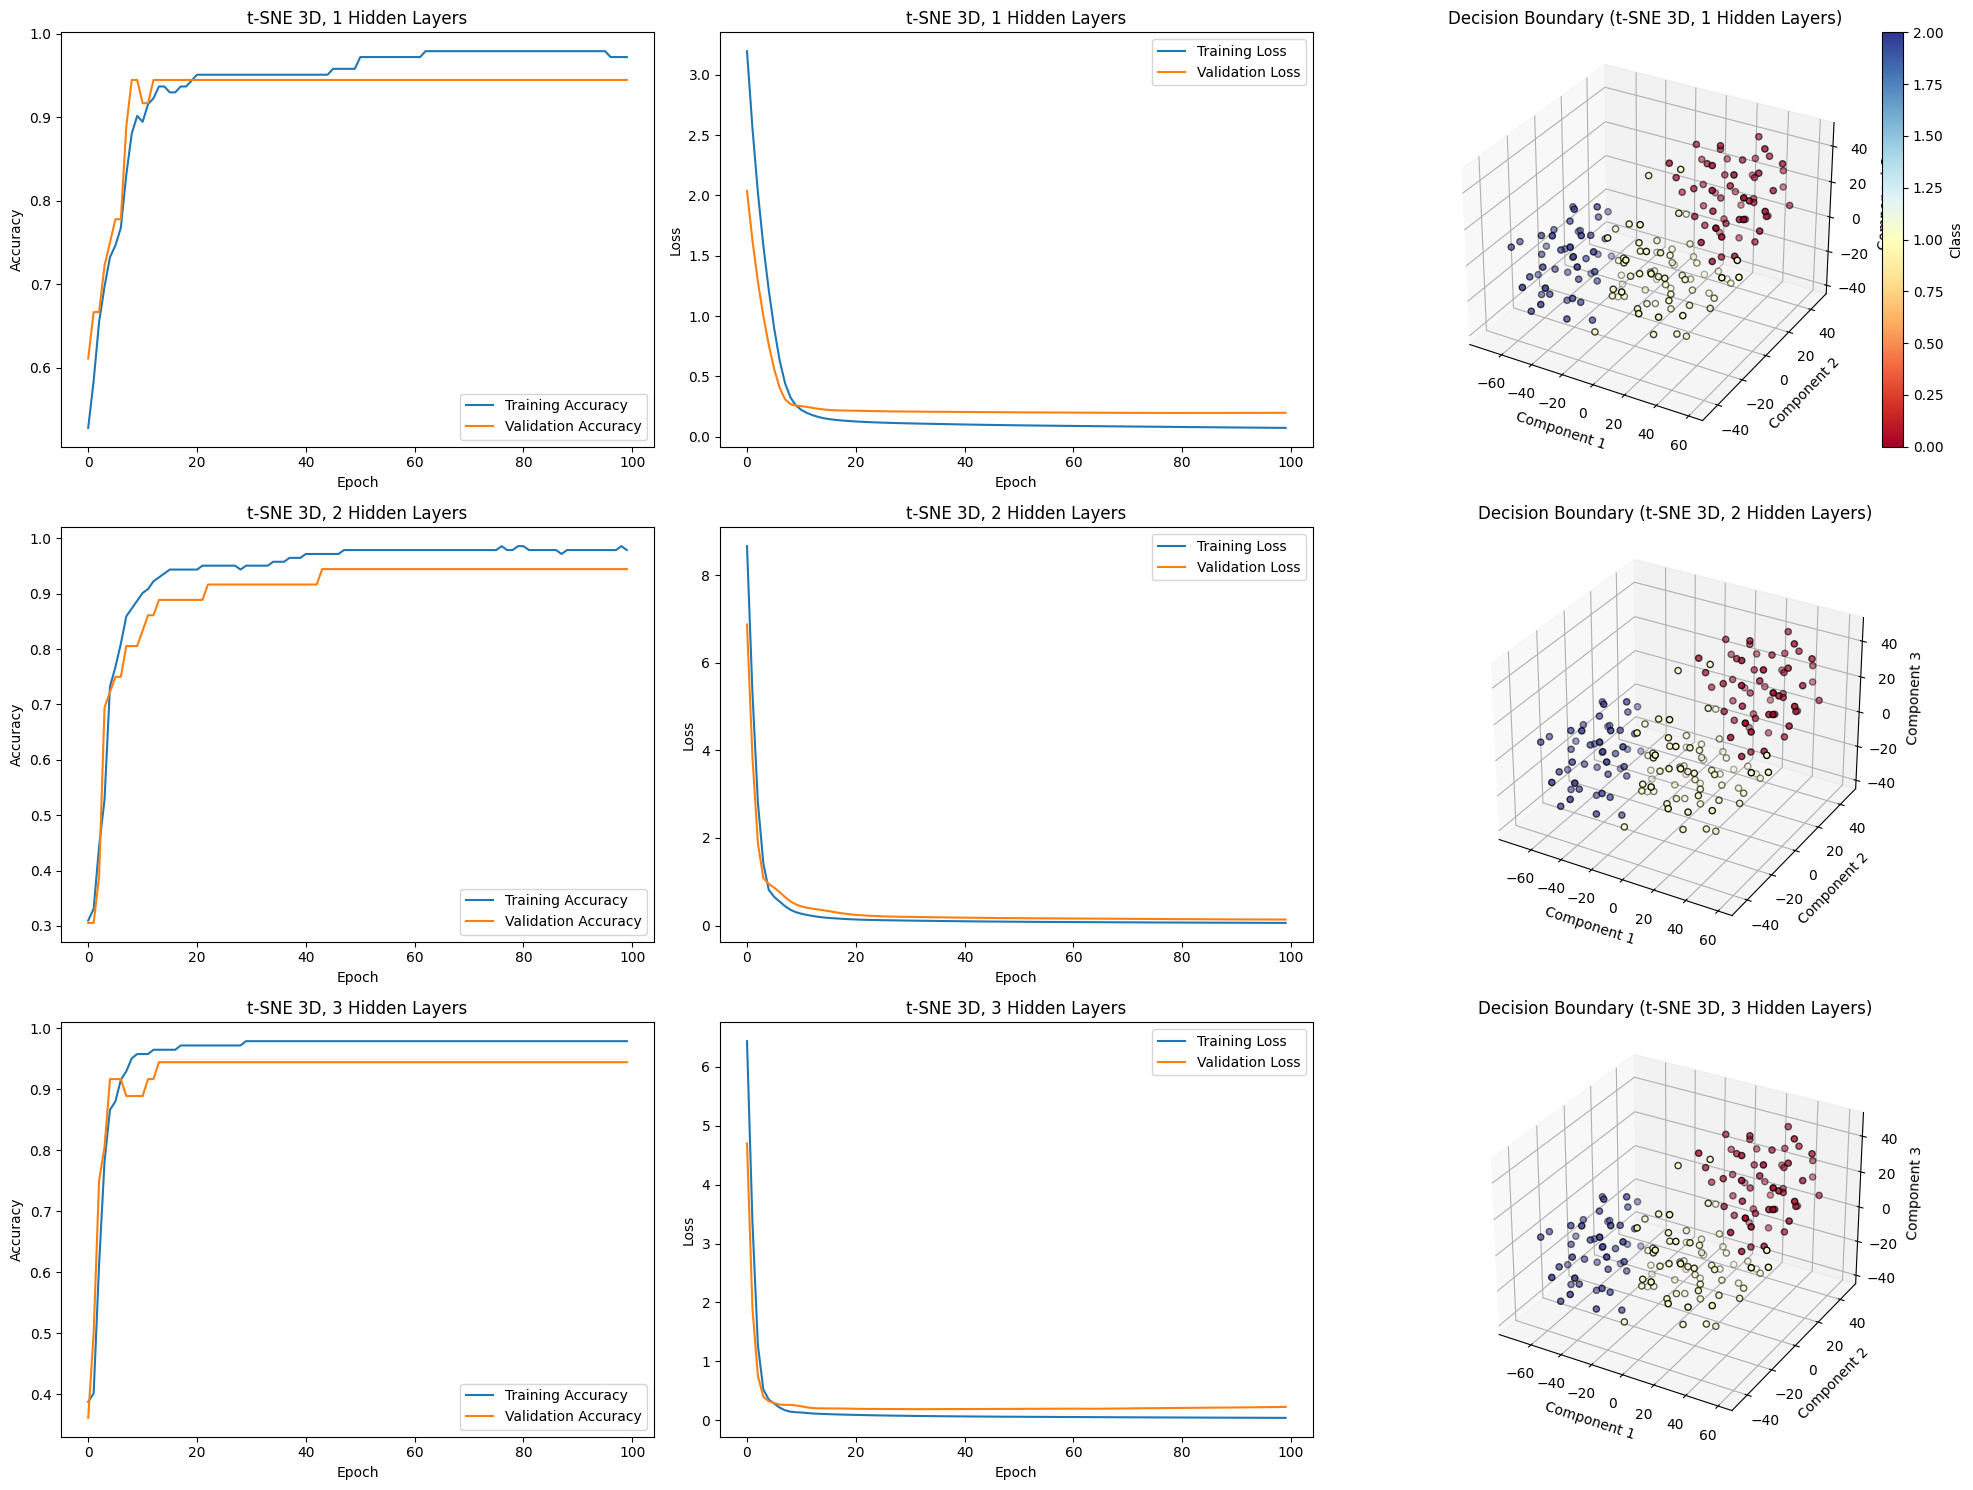

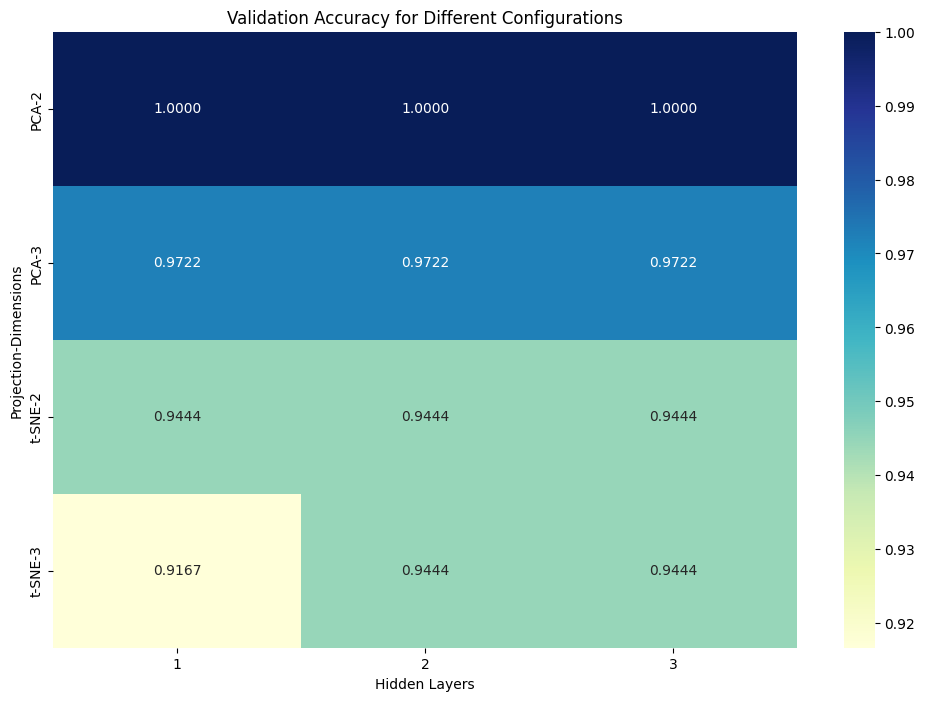

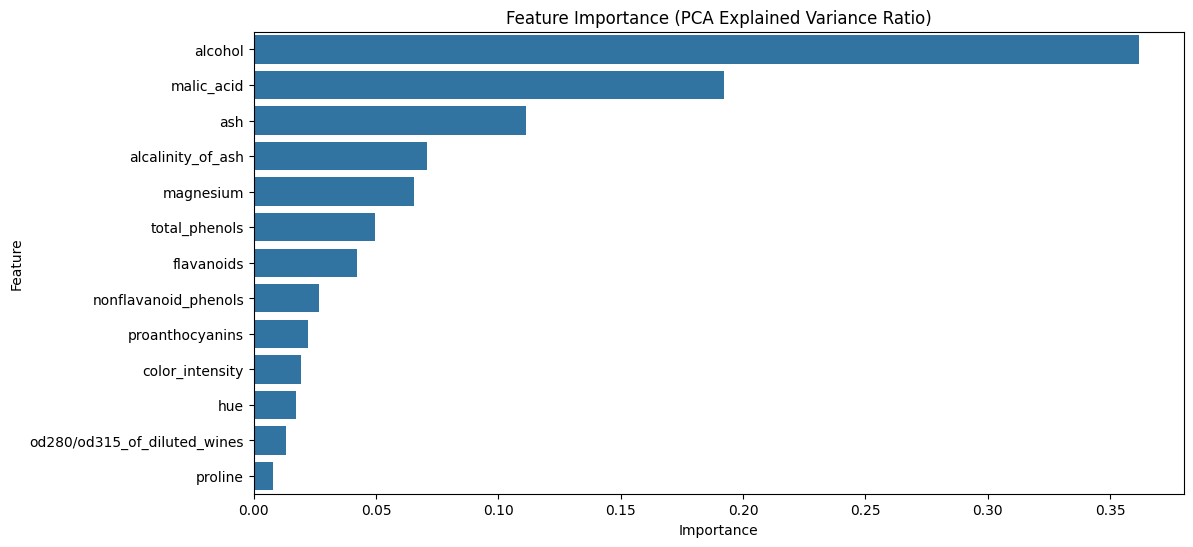

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load and preprocess the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create 2D and 3D projections of the data using PCA and t-SNE
pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)
tsne_2d = TSNE(n_components=2, random_state=42)
tsne_3d = TSNE(n_components=3, random_state=42)

X_pca_2d = pca_2d.fit_transform(X_scaled)
X_pca_3d = pca_3d.fit_transform(X_scaled)
X_tsne_2d = tsne_2d.fit_transform(X_scaled)
X_tsne_3d = tsne_3d.fit_transform(X_scaled)

# Create model
def create_model(input_dim, hidden_layers, neurons_per_layer):
    model = Sequential()
    model.add(Dense(neurons_per_layer, input_shape=(input_dim,), activation='relu'))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons_per_layer, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train model and return history
def train_model(X, y, hidden_layers, neurons_per_layer):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    y_train_cat = to_categorical(y_train)
    y_val_cat = to_categorical(y_val)

    model = create_model(X.shape[1], hidden_layers, neurons_per_layer)
    history = model.fit(X_train, y_train_cat, epochs=100, batch_size=32, validation_data=(X_val, y_val_cat), verbose=0)
    return model, history

# Visualize decision boundary (2D)
def plot_decision_boundary_2d(X, y, model, ax, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis=1).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_title(title)
    return scatter

# Visualize decision boundary (3D)
def plot_decision_boundary_3d(X, y, model, ax, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    z_min, z_max = X[:, 2].min() - 0.5, X[:, 2].max() + 0.5
    xx, yy, zz = np.meshgrid(np.linspace(x_min, x_max, 20),
                             np.linspace(y_min, y_max, 20),
                             np.linspace(z_min, z_max, 20))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
    Z = np.argmax(Z, axis=1).reshape(xx.shape)
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    ax.set_title(title)
    return scatter

# Experiment parameters
projections = ['PCA', 't-SNE']
dimensions = [2, 3]
hidden_layers_list = [1, 2, 3]
neurons_per_layer = 32

# Run experiments
for proj in projections:
    for dim in dimensions:
        if proj == 'PCA':
            X = X_pca_2d if dim == 2 else X_pca_3d
        else:
            X = X_tsne_2d if dim == 2 else X_tsne_3d

        fig = plt.figure(figsize=(20, 5 * len(hidden_layers_list)))
        for i, hidden_layers in enumerate(hidden_layers_list):
            model, history = train_model(X, y, hidden_layers, neurons_per_layer)

            ax1 = fig.add_subplot(len(hidden_layers_list), 3, 3*i + 1)
            ax1.plot(history.history['accuracy'], label='Training Accuracy')
            ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
            ax1.set_title(f'{proj} {dim}D, {hidden_layers} Hidden Layers')
            ax1.set_xlabel('Epoch')
            ax1.set_ylabel('Accuracy')
            ax1.legend()

            ax2 = fig.add_subplot(len(hidden_layers_list), 3, 3*i + 2)
            ax2.plot(history.history['loss'], label='Training Loss')
            ax2.plot(history.history['val_loss'], label='Validation Loss')
            ax2.set_title(f'{proj} {dim}D, {hidden_layers} Hidden Layers')
            ax2.set_xlabel('Epoch')
            ax2.set_ylabel('Loss')
            ax2.legend()

            if dim == 2:
                ax3 = fig.add_subplot(len(hidden_layers_list), 3, 3*i + 3)
                scatter = plot_decision_boundary_2d(X, y, model, ax3, f'Decision Boundary ({proj} {dim}D, {hidden_layers} Hidden Layers)')
            else:
                ax3 = fig.add_subplot(len(hidden_layers_list), 3, 3*i + 3, projection='3d')
                scatter = plot_decision_boundary_3d(X, y, model, ax3, f'Decision Boundary ({proj} {dim}D, {hidden_layers} Hidden Layers)')

            if i == 0:
                plt.colorbar(scatter, ax=ax3, label='Class')

        plt.tight_layout()
        plt.savefig(f'{proj}_{dim}D_results.png', dpi=300, bbox_inches='tight')
        plt.show()

# Print final accuracies
results = []
for proj in projections:
    for dim in dimensions:
        if proj == 'PCA':
            X = X_pca_2d if dim == 2 else X_pca_3d
        else:
            X = X_tsne_2d if dim == 2 else X_tsne_3d

        for hidden_layers in hidden_layers_list:
            model, history = train_model(X, y, hidden_layers, neurons_per_layer)
            results.append({
                'Projection': proj,
                'Dimensions': dim,
                'Hidden Layers': hidden_layers,
                'Accuracy': history.history['val_accuracy'][-1]
            })

# Create a heatmap of the results
import pandas as pd
results_df = pd.DataFrame(results)
pivot_df = results_df.pivot_table(values='Accuracy', index=['Projection', 'Dimensions'], columns='Hidden Layers')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt='.4f')
plt.title('Validation Accuracy for Different Configurations')
plt.savefig('accuracy_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Feature importance analysis
pca = PCA()
pca.fit(X_scaled)
feature_importance = pd.DataFrame({
    'feature': wine.feature_names,
    'importance': pca.explained_variance_ratio_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance (PCA Explained Variance Ratio)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()